In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import env
import wrangle
import split_scale
import explore

In [5]:
df = wrangle.wrangle_telco()
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [6]:
df.set_index('customer_id', inplace=True)

In [7]:
df.head(1)

,monthly_charges,tenure,total_charges
customer_id,,,
0013-SMEOE,109.7,71,7904.25


## Write a function, plot_variable_pairs(dataframe) that plots all of the pairwise relationships along with the regression line for each pair.

In [14]:
def plot_variable_pairs(df):
    """
    Takes:
          df
    Returns:
          PairGrid plot of all relationships
          histogram and scatter plots
    """
    g = sns.PairGrid(df)
    g.map_diag(plt.hist)
    g.map_offdiag(sns.regplot)
    
    plt.show()

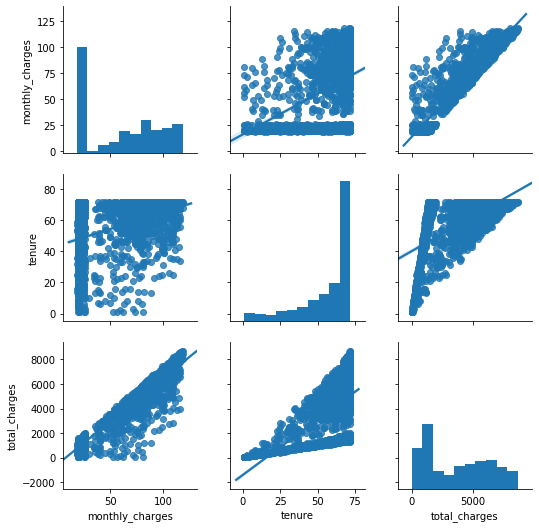

In [15]:
plot_variable_pairs(df)

## Write a function, months_to_years(tenure_months, df) that returns your dataframe with a new feature tenure_years, in complete years as a customer.

In [7]:
def months_to_years(df):
    """
    Takes:
          df
    Returns:
          df with new feature "tenure_years"
    """
    df["tenure_years"] = round(df.tenure // 12).astype(object)
    return df

In [8]:
df = months_to_years(df)
df.head()

,monthly_charges,tenure,total_charges,tenure_years
customer_id,,,,
0013-SMEOE,109.70,71,7904.25,5
0014-BMAQU,84.65,63,5377.80,5
0016-QLJIS,90.45,65,5957.90,5
0017-DINOC,45.20,54,2460.55,4
0017-IUDMW,116.80,72,8456.75,6


In [9]:
df.tenure_years.value_counts()

5    676
6    343
4    265
3    166
2    103
1     83
0     59
Name: tenure_years, dtype: int64

In [10]:
# Validate our data types

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1695 entries, 0013-SMEOE to 9995-HOTOH
Data columns (total 4 columns):
monthly_charges    1695 non-null float64
tenure             1695 non-null int64
total_charges      1695 non-null float64
tenure_years       1695 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 146.2+ KB


## Write a function, plot_categorical_and_continous_vars(categorical_var, continuous_var, df), that outputs 3 different plots for plotting a categorical variable with a continuous variable.

- e.g. tenure_years with total_charges. 


- For ideas on effective ways to visualize categorical with continuous: https://datavizcatalogue.com/. You can then look into seaborn and matplotlib documentation for ways to create plots.

In [11]:
# def plot_categorical_and_continuous_vars(df):
#     """
#     Takes:
#           df
#     Returns:
#           three plots of categorical var with continuous var
#     """
#     fig.tight_layout()
#     plt.suptitle('Total Charges by Tenure Group', fontsize=18)
    
#     sns.lineplot(x="tenure_years", y="total_charges", data=df)
#     plt.xlabel("Tenure in years", fontsize=12)
#     plt.ylabel("Total Charges in Dollars", fontsize=12)
#     plt.show()
    
    
#     sns.catplot(x="tenure_years", y="total_charges", data=df, kind="swarm", palette='Blues')
#     plt.xlabel("Tenure in years", fontsize=12)
#     plt.ylabel("Total Charges in Dollars", fontsize=12)
#     plt.show()
    
#     sns.catplot(x="tenure_years", y="total_charges", data=df, kind="bar", palette='Purples')
#     plt.xlabel("Tenure in years", fontsize=12)
#     plt.ylabel("Total Charges in Dollars", fontsize=12)
#     plt.show()

In [12]:
def plot_categorical_and_continuous_vars(categorical_var, continuous_var, df):
    """
    Takes:
          df
    Returns:
          three plots of categorical var with continuous var
    """
    plt.suptitle(f'{continuous_var} by {categorical_var}', fontsize=18)
    
    sns.lineplot(x=categorical_var, y=continuous_var, data=df)
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)
    plt.show()
    
    
    sns.catplot(x=categorical_var, y=continuous_var, data=df, kind="swarm", palette='Blues')
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)
    plt.show()
    
    sns.catplot(x=categorical_var, y=continuous_var, data=df, kind="bar", palette='Purples')
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)
    plt.show()

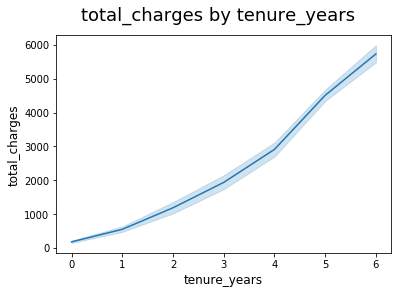

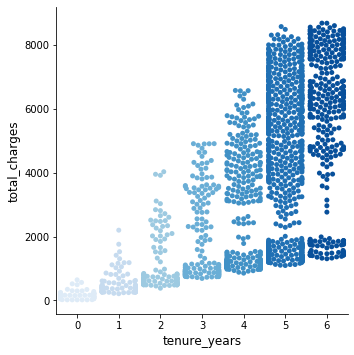

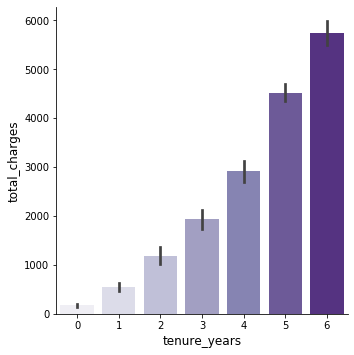

In [13]:
plot_categorical_and_continuous_vars('tenure_years', 'total_charges', df)

# Object Oriented Approach, subplots method

- figure is the container holding our plots

- axes are the actual plots

- so our plot can contain more than one axis

In [14]:
def plot_categorical_and_continuous_vars_telco(df):  
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,10), nrows=3,ncols=1, sharex=True)
    plt.style.use('seaborn-bright')

    plt.suptitle('Total Charges by Tenure Years', fontsize=18)

    ax1.plot(df.tenure_years, df.total_charges, color='mediumblue')
    ax1.set_ylabel('US Dollars', fontsize=14)

    ax2.bar(df.tenure_years, df.total_charges, color='dodgerblue')
    ax2.set_ylabel('US Dollars', fontsize=14)

    ax3.scatter(df.tenure_years, df.total_charges, color='skyblue')
    ax3.set_xlabel('Tenure in Years', fontsize=14)
    ax3.set_ylabel('US Dollars', fontsize=14)

    plt.tight_layout()
    plt.show()

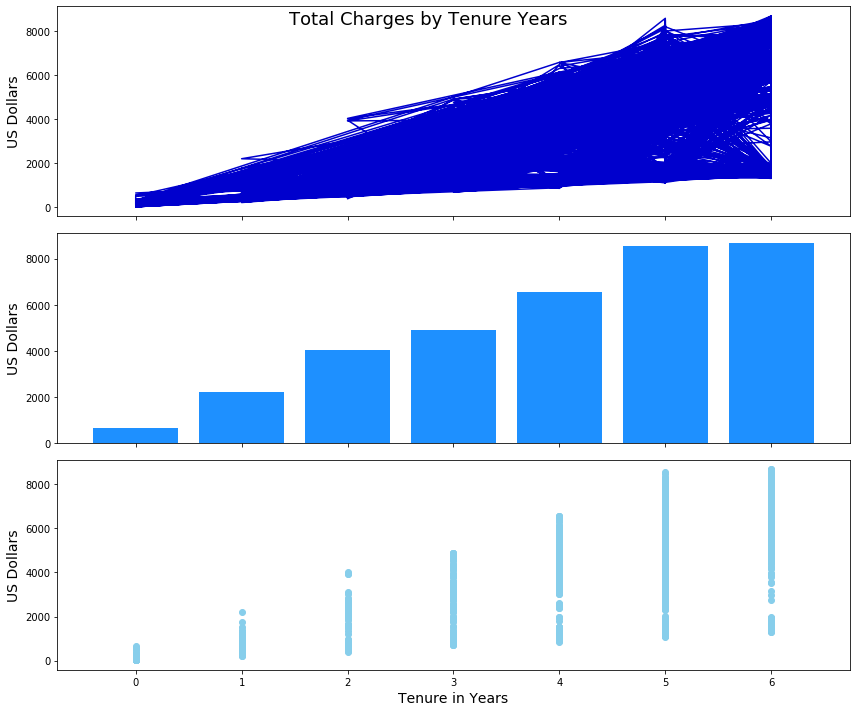

In [15]:
plot_categorical_and_continuous_vars_telco(df)

# How about some pie?

In [16]:
def telco_pie(df):
    plt.style.use('seaborn-paper')
    labels = ['0 years', '1 years', '2 years', '3 years', '4 years', '5 years', '6 years']
    colors = ['dodgerblue', 'whitesmoke', 'whitesmoke', 'whitesmoke', 'whitesmoke', 'whitesmoke', 'whitesmoke']
    explode = (0.1, 0, 0, 0, 0, 0, 0) 
    
    plt.pie(df.tenure_years.value_counts(), explode=explode, colors=colors, labels = labels, autopct='%1.1f%%', shadow=True, textprops={'fontsize':14}, wedgeprops={'edgecolor': 'black', 'width': 0.6})
    plt.title('Percent of Accounts by Tenure Years', fontsize=18)
    plt.show()

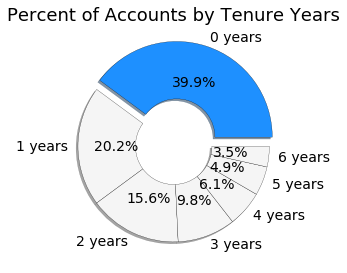

In [17]:
telco_pie(df)